In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Conv2D,Input,Dense,MaxPool2D,BatchNormalization,Flatten,GlobalAvgPool2D

# how to create deep learning models
- tensorflow .keras .sequential
- functional approach: function that returns a model

- tenosrflow.keras.Model :inherit from a base class, you override some of it and use

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

HOw to explore a dataset

In [6]:
def display_some_examples(examples,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    idx = np.random.randint(0,examples.shape[0]-1)
    img = examples[idx]
    label = labels[idx]

    plt.subplot(5,5,i+1)
    plt.title(str(label))
    plt.tight_layout()# see images and labels in a more clear way
    plt.imshow(img,cmap='gray')
  plt.show()


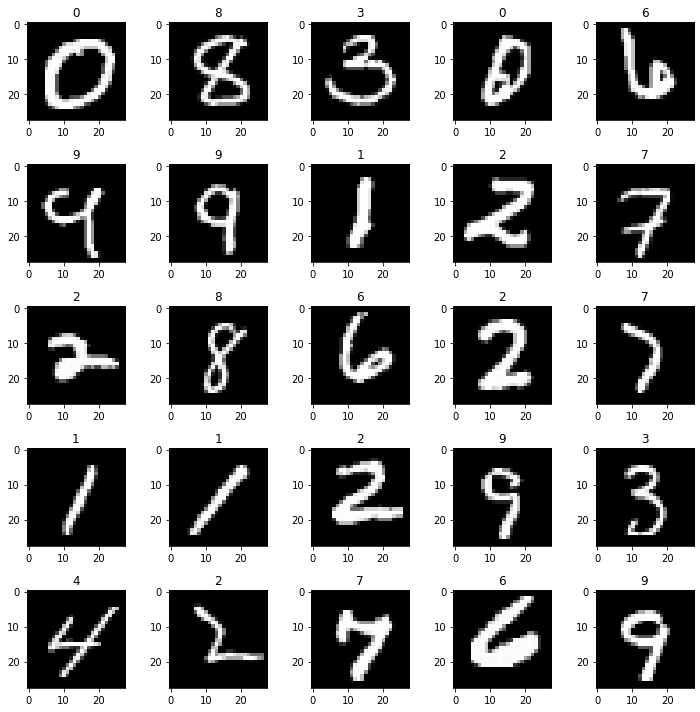

In [7]:
display_some_examples(x_train,y_train)

# sequential model

In [8]:
x_train =x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = np.expand_dims(x_train,axis=-1) # dimension change otehr wise it wont work in our model
x_test = np.expand_dims(x_test,axis=-1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:

seq_model = tf.keras.Sequential(
    [
     Input(shape=(28,28,1)) # here 1 rperesents 1 channel that is only gray
     , Conv2D(32,(3,3),activation='relu'),
     Conv2D(64,(3,3),activation='relu'),
     MaxPool2D(),
     BatchNormalization(),

     Conv2D(128,(3,3),activation='relu'),
     MaxPool2D(),
     BatchNormalization(),# by this it can help in improving performance it takes output of previous layer and normlaizes the batches


     GlobalAvgPool2D(),# takes output from batch normalization computes avg value accoding to axis and then feeds it to dense layers
     Dense(64,activation='relu'),
     Dense(10,activation='softmax') # 10 classes from 0-9
    ]
)

# Functional Way to build Model

- Basically pass output of previous layer as input to current layer

- returns a model

- MOre advantageous can create multiple models and is better than sequential model

In [11]:
def functional_model():
     my_input = Input(shape=(28,28,1)) 
     x= Conv2D(32,(3,3),activation='relu')(my_input)
     x=Conv2D(64,(3,3),activation='relu')(x)
     x=MaxPool2D()(x)
     x=BatchNormalization()(x)

     x=Conv2D(128,(3,3),activation='relu')(x)
     x=MaxPool2D()(x)
     x=BatchNormalization()(x)

     x=GlobalAvgPool2D()(x)
     x=Dense(64,activation='relu')(x)
     x=Dense(10,activation='softmax')(x)

     model = tf.keras.Model(inputs=my_input,outputs=x)

     return model

In [12]:
# model = functional_model()

# Inherit from class tensorflow.keras.model

In [15]:
class MyCustomModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.conv1 = Conv2D(32,(3,3),activation='relu')
    self.conv2=Conv2D(64,(3,3),activation='relu')
    self.maxpool1=MaxPool2D()
    self.batchnorm1=BatchNormalization()

    self.conv3=Conv2D(128,(3,3),activation='relu')
    self.maxpool2=MaxPool2D()
    self.batchnorm2=BatchNormalization()

    self.globalavgpool1=GlobalAvgPool2D()
    self.dense1=Dense(64,activation='relu')
    self.dense2=Dense(10,activation='softmax')

  def call(self,my_input):
     x=self.conv1(my_input)
     x=self.conv2(x)
     x=self.maxpool1(x)
     x=self.batchnorm1(x)

     x=self.conv3(x)
     x=self.maxpool2(x)
     x=self.batchnorm2(x)

     x=  self.globalavgpool1(x)
     x=self.dense1(x)
     x=self.dense2(x)

     return x

     

In [17]:
model=MyCustomModel()

# Compile

In [18]:
# -- If we wanna use categorical cross entropy 
# to turn into one hotencoded

y_train= tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# 10 outputs 0-9
#---

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

# categorical -> needs to be one hot encoded
# no one hotencoding use sparse categorical crossentropy 

#model training

In [19]:
model.fit(x_train,y_train,batch_size=64,epochs=3,validation_split=0.2)

Epoch 1/3
750/750 [==============================] - 23s 18ms/step - loss: 0.2298 - accuracy: 0.9375 - val_loss: 0.1538 - val_accuracy: 0.9562
Epoch 2/3
750/750 [==============================] - 13s 18ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.0565 - val_accuracy: 0.9822
Epoch 3/3
750/750 [==============================] - 12s 17ms/step - loss: 0.0353 - accuracy: 0.9892 - val_loss: 0.0955 - val_accuracy: 0.9699


# evaluation

In [20]:

model.evaluate(x_test,y_test,batch_size=64)

157/157 [==============================] - 1s 7ms/step - loss: 0.0965 - accuracy: 0.9699


[0.09645364433526993, 0.9699000120162964]

In [21]:
y_train.shape

(60000, 10)